In [2]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.metrics import accuracy_score

In [3]:
# loading the diabetes dataset to a pandas DataFrame
diabetes_dataset = pd.read_csv("C:\\Users\91976\Downloads\diabetes.csv") 

In [4]:
#pd.read_csv?
diabetes_dataset

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [5]:
# printing the first 5 rows of the dataset

#diabetes_dataset.head()
#diabetes_dataset.isnull().sum()
#diabetes_dataset.info
#diabetes_dataset.describe().columns

In [6]:
# number of rows and Columns in this dataset
diabetes_dataset.shape

(768, 9)

In [7]:
# getting the statistical measures of the data
diabetes_dataset.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


<AxesSubplot:xlabel='Glucose', ylabel='BloodPressure'>

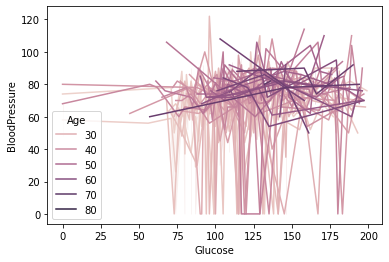

In [8]:
import seaborn as sns
sns.lineplot(x = diabetes_dataset.Glucose , y = diabetes_dataset.BloodPressure , hue= diabetes_dataset.Age)

<AxesSubplot:xlabel='BloodPressure', ylabel='Count'>

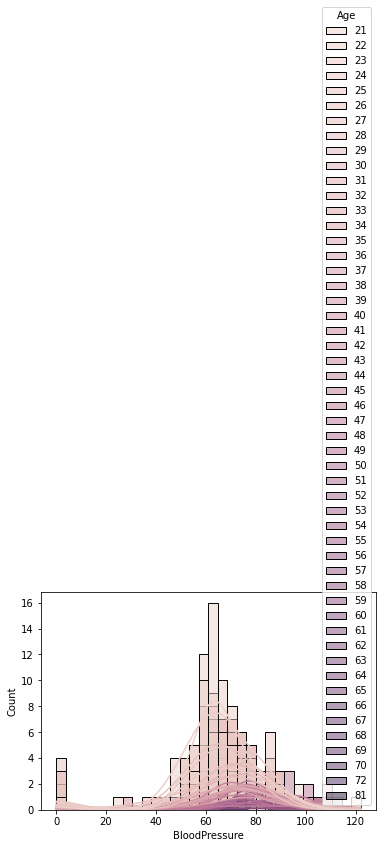

In [9]:
# ploting the graph for BloodPressure vs Age 
sns.histplot(x = 'BloodPressure', data = diabetes_dataset , hue = 'Age',kde= True)

In [10]:
#finding the min and max value by coloum 

min_val = diabetes_dataset["Age"]. min()
min_val
max_val = diabetes_dataset["Age"]. max()
max_val

81

In [11]:
#finding the how many time reapeted the perticular value 

diabetes_dataset['Outcome'].value_counts()

0    500
1    268
Name: Outcome, dtype: int64

In [12]:
# separating the data and labels

X = diabetes_dataset.drop(columns = 'Outcome', axis=1)
Y = diabetes_dataset['Outcome']

In [13]:
print(X)

     Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0              6      148             72             35        0  33.6   
1              1       85             66             29        0  26.6   
2              8      183             64              0        0  23.3   
3              1       89             66             23       94  28.1   
4              0      137             40             35      168  43.1   
..           ...      ...            ...            ...      ...   ...   
763           10      101             76             48      180  32.9   
764            2      122             70             27        0  36.8   
765            5      121             72             23      112  26.2   
766            1      126             60              0        0  30.1   
767            1       93             70             31        0  30.4   

     DiabetesPedigreeFunction  Age  
0                       0.627   50  
1                       0.351   31  


In [14]:
print(Y)

0      1
1      0
2      1
3      0
4      1
      ..
763    0
764    0
765    0
766    1
767    0
Name: Outcome, Length: 768, dtype: int64


In [15]:
scaler = StandardScaler()

In [16]:
scaler.fit(X)

StandardScaler()

In [17]:
standardized_data = scaler.transform(X)

In [18]:
print(standardized_data)

[[ 0.63994726  0.84832379  0.14964075 ...  0.20401277  0.46849198
   1.4259954 ]
 [-0.84488505 -1.12339636 -0.16054575 ... -0.68442195 -0.36506078
  -0.19067191]
 [ 1.23388019  1.94372388 -0.26394125 ... -1.10325546  0.60439732
  -0.10558415]
 ...
 [ 0.3429808   0.00330087  0.14964075 ... -0.73518964 -0.68519336
  -0.27575966]
 [-0.84488505  0.1597866  -0.47073225 ... -0.24020459 -0.37110101
   1.17073215]
 [-0.84488505 -0.8730192   0.04624525 ... -0.20212881 -0.47378505
  -0.87137393]]


In [19]:
X = standardized_data
Y = diabetes_dataset['Outcome']

In [20]:
print(X)
print(Y)

[[ 0.63994726  0.84832379  0.14964075 ...  0.20401277  0.46849198
   1.4259954 ]
 [-0.84488505 -1.12339636 -0.16054575 ... -0.68442195 -0.36506078
  -0.19067191]
 [ 1.23388019  1.94372388 -0.26394125 ... -1.10325546  0.60439732
  -0.10558415]
 ...
 [ 0.3429808   0.00330087  0.14964075 ... -0.73518964 -0.68519336
  -0.27575966]
 [-0.84488505  0.1597866  -0.47073225 ... -0.24020459 -0.37110101
   1.17073215]
 [-0.84488505 -0.8730192   0.04624525 ... -0.20212881 -0.47378505
  -0.87137393]]
0      1
1      0
2      1
3      0
4      1
      ..
763    0
764    0
765    0
766    1
767    0
Name: Outcome, Length: 768, dtype: int64


In [21]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size = 0.2, stratify=Y, random_state=2)

In [22]:
print(X.shape, X_train.shape, X_test.shape)

(768, 8) (614, 8) (154, 8)


In [23]:
classifier = svm.SVC(kernel='linear')

In [24]:
#training the support vector Machine Classifier
classifier.fit(X_train, Y_train)

SVC(kernel='linear')

In [25]:
# accuracy score on the training data
X_train_prediction = classifier.predict(X_train)
training_data_accuracy = accuracy_score(X_train_prediction, Y_train)

In [26]:
print('Accuracy score of the training data : ', training_data_accuracy)

Accuracy score of the training data :  0.7866449511400652


In [27]:
# accuracy score on the test data
X_test_prediction = classifier.predict(X_test)
test_data_accuracy = accuracy_score(X_test_prediction, Y_test)

In [28]:
print('Accuracy score of the test data : ', test_data_accuracy)

Accuracy score of the test data :  0.7727272727272727


In [30]:
# we are passing the below prameters : 
# (Pregnancies = 5), (Glucose = 166), (BloodPressure = 72), (SkinThickness = 19), 
# (Insulin= 175), (BMI = 25.8), (DiabetesPedigreeFunction = 0.587), (Age = 51)

# input_data = (5,166,72,19,175,25.8,0.587,51)

print("***  ||\\ Enter patient details  //|| *** ")
print("\n")

print("\n")
print("__For better output use Range value __")
print("\n")

a =  float(input("Enter patient Pregnancies  Range is (0 to 20 ) : "))
b = float(input("Enter patient Glucose Range is (0 to 200) : "))
c = float(input("Enter patient BloodPressure Range is (0 to 150) : "))
d = float(input("Enter patient SkinThickness Range is (0 to 100) "))
e = float(input("Enter patient Insulin Range is (0 to 1000) : "))
f = float(input("Enter patient BMI Range is (0 to 70) : "))
g = float(input("Enter patient DiabetesPedigreeFunction Range is (0 to 3) : "))
h = float(input("Enter patient Age Range is (0 to 100) : "))

input_data = (a,b,c,d,e,f,g,h)


# changing the input_data to numpy array
input_data_as_numpy_array = np.asarray(input_data)

# reshape the array as we are predicting for one instance
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

# standardize the input data
std_data = scaler.transform(input_data_reshaped)
print(std_data)

prediction = classifier.predict(std_data)
print(prediction)

if (prediction[0] == 0):
  print('The person is not diabetic')
else:
  print('The person is diabetic')

***  ||\ Enter patient details  //|| *** 




__For better output use Range value __


Enter patient Pregnancies  Range is (0 to 20 ) : 4
Enter patient Glucose Range is (0 to 200) : 4
Enter patient BloodPressure Range is (0 to 150) : 4
Enter patient SkinThickness Range is (0 to 100) 4
Enter patient Insulin Range is (0 to 1000) : 4
Enter patient BMI Range is (0 to 70) : 4
Enter patient DiabetesPedigreeFunction Range is (0 to 3) : 4
Enter patient Age Range is (0 to 100) : 4
[[ 0.04601433 -3.65846513 -3.36580624 -1.03729997 -0.65815899 -3.55279689
  10.65535228 -2.48804124]]
[0]
The person is not diabetic
